<a href="https://colab.research.google.com/github/sifatullahkarwan/Pytorch-Tutorial/blob/main/prt_3_NNs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
A neural network is a machine learning program or model inspired by the human brain, designed to learn and make decisions by processing data through interconnected nodes called neurons.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
# Create a Model Class that inherits nn.Modele
class Model(nn.Module):
  # Inpute  layer ( 4 features of the flower) -- > Hidden Layer1 (number of neurons) --H2 ---> output ( 3 class of iris flowers)
  def __init__(self,in_features = 4,h1 = 8,h2 = 9,out_feature = 3):
    super().__init__()#instantiate our model of nn.model
    self.fc1 = nn.Linear(in_features,h1)#Applies an affine linear transformation
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_feature)

  def forward(self,x):
    x = F.relu(self.fc1(x))

    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))
    return x
    #F.relu  Rectified Linear Unit (ReLU)
    #The activation function is a class in PyTorch that helps to convert linear function to
    # non-linear and converts complex data into simple functions so that it can be solved easily.

In [6]:
# Pick a manual seed for randomizaiton
torch.manual_seed(41)# generato random number
model = Model()

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [8]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
my_df = pd.read_csv(url)


In [9]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

<ipython-input-9-3775887882>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
# Train Test Split Set x y
X = my_df.drop('species',axis =1)
y = my_df['species']


In [11]:
# convert these to numpy arrary
x = X.values
y = y.values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Train Test Split
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=41)


In [14]:
# Convert x features to float tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)

In [15]:
# Convert y labels to tensr long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [16]:
# Set the criterion of model to measure the error, how far off the predictions are from data
criterion = nn.CrossEntropyLoss()
# choose Adam optimizer , lr = learning rate (if error doesn't go down after a bucnh of iterations (epochs),lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [17]:
# Train our model
# Epochs (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get the prediction
  y_pred = model.forward(x_train)# get predicted result

  # measure the loss/error
  loss = criterion(y_pred,y_train)

  # keep Track of our loss
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i %10 == 0:
    print(f'Epoch: {i} and loss : {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss : 1.1251550912857056
Epoch: 10 and loss : 1.0096259117126465
Epoch: 20 and loss : 0.8512223958969116
Epoch: 30 and loss : 0.654869019985199
Epoch: 40 and loss : 0.44905662536621094
Epoch: 50 and loss : 0.2707386612892151
Epoch: 60 and loss : 0.15461841225624084
Epoch: 70 and loss : 0.09299226105213165
Epoch: 80 and loss : 0.06447023898363113
Epoch: 90 and loss : 0.050585027784109116


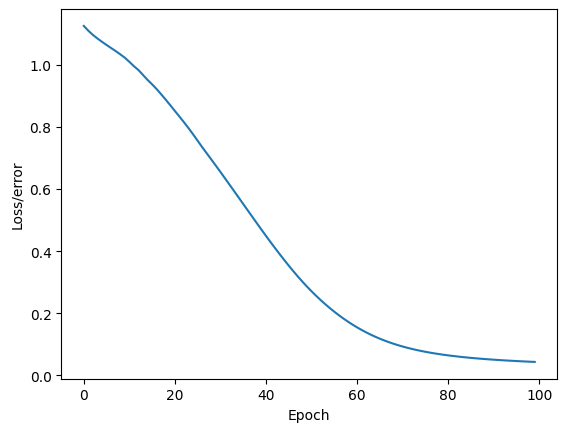

In [18]:
# Graph
plt.plot(range(epochs),losses)
plt.ylabel('Loss/error')
plt.xlabel('Epoch')
plt.show()

In [19]:
# #valuate Model on Test Data Set (validate model on test set)

with torch.no_grad(): # Basically turn off back propogation
  y_eval = model.forward(x_test) # x_test are feateres from our test set , y_eveal be predictions
  loss = criterion(y_eval , y_test) # fin the loss or error



In [20]:
loss

tensor(0.1296)

In [22]:
correct = 0
with torch.no_grad():
  for i , data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "setosa"
    elif y_test[i] == 1:
      x = "versicolor"
    else:
      x= "virginica"

    # will tell us what type of flowers our network thins it is
    print(f'{i+1}/) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')


    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

    print(f'We got {correct} correct')

1/) tensor([0.0000, 7.4818, 9.9517]) 	 2 	 2
We got 1 correct
2/) tensor([ 0.0000,  7.7416, 14.4150]) 	 2 	 2
We got 2 correct
3/) tensor([ 0.0000,  9.1741, 15.2260]) 	 2 	 2
We got 3 correct
4/) tensor([0.2420, 8.3711, 4.5725]) 	 1 	 1
We got 4 correct
5/) tensor([ 0.0000,  8.4455, 12.5213]) 	 2 	 2
We got 5 correct
6/) tensor([1.6580, 8.0895, 2.0248]) 	 1 	 1
We got 6 correct
7/) tensor([0.0000, 8.1067, 9.3146]) 	 2 	 2
We got 7 correct
8/) tensor([0.3616, 8.4538, 4.3424]) 	 1 	 1
We got 8 correct
9/) tensor([ 0.0000,  8.2780, 10.8831]) 	 2 	 2
We got 9 correct
10/) tensor([ 0.0000,  8.2340, 15.2944]) 	 2 	 2
We got 10 correct
11/) tensor([0.0000, 8.0207, 8.7722]) 	 2 	 2
We got 11 correct
12/) tensor([9.0044, 3.5022, 0.0000]) 	 0 	 0
We got 12 correct
13/) tensor([8.0835, 3.2078, 0.0000]) 	 0 	 0
We got 13 correct
14/) tensor([2.2655, 6.5108, 0.4715]) 	 1 	 1
We got 14 correct
15/) tensor([8.0545, 3.9531, 0.0000]) 	 0 	 0
We got 15 correct
16/) tensor([0.0000, 8.1667, 8.0483]) 	 2 	